$$
\Huge{ \text{ Gradient Descent}}
$$
$$
Binh ~ Tran
$$

# Gradient Descent

## Introduction

* In Machine Learning in particular and Optimizing Math in general, 
we often have **to find the smallest** (or sometimes largest) value of a function.

* In general, **finding the global minimum** of the loss functions in Machine Learning is **very complex,** even impossible.

* **Instead,** we try to **find local minimum** points and consider them to be the solution of the problem

* **Local minimum** points are the solution of the **derivative of equation 0**.

* However, in most cases, **solving equation of zero** derivatives is **impossible**.

**The most common approach is to derive is:**

* From a point we consider closer to the solution of the problem, 
then use a iterative operation to get to the point where the derivative is close to 0.


* Gradient Descent (in short GD) and its variants are one of the most used methods.

## Gradient Descent for function 1 variable

<img  src="HBLD8MUAXB2M7CYHB9O8AT151HOY7HXC.png" width='800'/>

* Let $ y = f(x)$
* Assume $f$ is differentiable (means $f$ have $f' ~ \forall x$)
  1. If $x^*$ is local minimum of $f(x)\Rightarrow$ 
     * $ f'(x^*) = 0 $
     * $ \forall x < x^* \Rightarrow f’(x) < 0 $
     * $ \forall x > x^* \Rightarrow f’(x) > 0 $

* 
$ \Rightarrow $
$ x_{t+1} = x_{t} - \eta f’(x_{t})$
* eta: $\eta > 0$ called **learning rate**

## Sample $f(x) = x^2 + 5\sin(x)$

In [1]:
import math
import numpy as np 
import matplotlib.pyplot as plt
import time
from IPython import display
%matplotlib inline


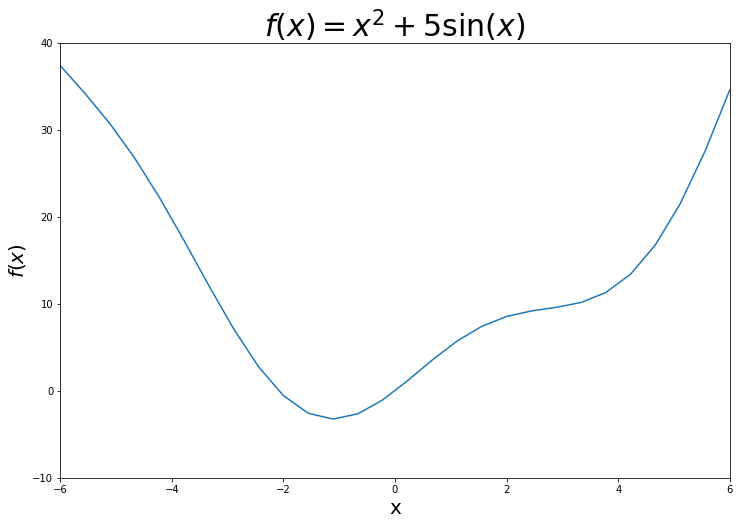

In [4]:
import matplotlib.pyplot as plt
import numpy as np
def f(x):
    return x**2 + 5*np.sin(x)
def plot_f():
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111)

    x_left = -6; x_right = 6; y_bottom = -10; y_top = 40
    x = np.linspace(x_left, x_right, 7*4)

    ax.plot(x, f(x))
    ax.axis([x_left, x_right, y_bottom, y_top])
    plt.xlabel('x', fontname="Arial", fontsize=20)
    plt.ylabel('$f(x)$', fontname="Arial", fontsize=20)
    plt.title("$f(x) = x^2 + 5\sin(x)$", fontsize=30)
plot_f()    

$\Rightarrow f’(x) = 2x + 5\cos(x)$

$x_{t+1} = x_{t} - \eta(2x_{t} + 5\cos(x_{t}))$

```python
def f(x):
    return x**2 + 5*np.sin(x)

def f_grad(x):
    return 2*x + 5*np.cos(x)

def GD(eta, x0):
    N = 100
    x = [x0]
    eps = 1e-3
    for i in range(N):
        x_new = x[-1] - eta * f_grad(x[-1])
        if abs(f_grad(x_new)) < eps:
            break
        x.append(x_new)
    return (x, i)
```

In [5]:
def f(x):
    return x**2 + 5*np.sin(x)
def f_grad(x):
    return 2*x + 5*np.cos(x)
def GD(eta, x0):
    N = 100
    x = [x0]
    eps = 1e-3
    for i in range(N):
        x_new = x[-1] - eta * f_grad(x[-1])
        print(f_grad(x_new))
        if abs(f_grad(x_new)) < eps:
            break
        x.append(x_new)
    return (x, i)

```python
(x1, it1) = GD(.1, -5)
(x2, it2) = GD(.1, 5)
print('Solution x1 = %f, cost = %f, obtained after %d iterations'%(x1[-1], f(x1[-1]), it1))
print('Solution x2 = %f, cost = %f, obtained after %d iterations'%(x2[-1], f(x2[-1]), it2))
```

In [8]:
# (x1, it1) = GD(.1, -5)
(x2, it2) = GD(.1, 5)
# print('Solution x1 = %f, lost = %f, obtained after %d iterations'%(x1[-1], f_grad(x1[-1]), it1))
print('Solution x2 = %f, lost = %f, obtained after %d iterations'%(x2[-1], f_grad(x2[-1]), it2))

3.9460433933781776
2.184062762623043
1.5171072279484328
1.1926888914374398
1.018262455277302
0.9248384906824434
0.8832967295164948
0.8809591974028139
0.9135932932323367
0.9825838933037279
1.0943434949263442
1.2610622339455744
1.5025343708991672
1.8487186705602023
2.341278054031142
3.0269334377546593
3.9196076253241974
4.88017416663781
5.405105667040182
4.739158520169648
2.983941960761601
1.3878713454848028
0.5439405104577038
0.19893809181679467
0.07097892557824004
0.02510523333653003
0.008852637013742282
0.0031182760914343355
0.0010979746526800227
0.0003865558782276679
Solution x2 = -1.110341, lost = 0.001098, obtained after 29 iterations


```python
def GD_Graph(eta, x0):
    plt.clf();
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111)
    #plt.ion()
    x_left = -6; x_right = 6; y_bottom = -10; y_top = 40
    x = np.linspace(x_left, x_right, 7*4)
    
    ax.plot(x, f(x))
    ax.axis([x_left, x_right, y_bottom, y_top])
    plt.xlabel('x', fontname="Arial", fontsize=20)
    plt.ylabel('y', fontname="Arial", fontsize=20)
    plt.title(r'$f(x) = x^2 + 5\sin(x)$ eta: %f ' %(eta), fontsize=20)
    
    # Alg
    N = 100
    x1 = [x0]
    eps = 1e-3
    
    # Alg
    for i in range(N):
        # Alg
        x_new = x1[-1] - eta * f_grad(x1[-1])
        ax.text(x_new, f(x_new), str(i) , style='italic', bbox={'facecolor':'yellow', 'alpha':0.9, 'pad':10})
        ax.plot(x_new, f(x_new), color='green', marker='o')
        ax.legend([r"$f(x) = x^2 + 5\sin(x)$"])
        
        plt.xlabel('iter: %d, x: %f, grad: %f' %(i, x_new, f_grad(x1[-1])))
        plt.ylabel('y: %f' %(f(x_new)))
        
        # Alg
        if abs(f_grad(x_new)) < eps:
            plt.xlabel('iter: %d, x: %f, grad: %f, eta: %f  --- STOP LOOP ---' %(i, x_new, f_grad(x1[-1]), eta))
            break
        # Alg
        x1.append(x_new)
        display.clear_output(wait=True)
        display.display(plt.gcf())
        time.sleep(.1)
    return (x1, i)
```

In [9]:
def GD_Graph(eta, x0):
    plt.clf();
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111)
    #plt.ion()
    x_left = -6; x_right = 6; y_bottom = -10; y_top = 40
    x = np.linspace(x_left, x_right, 7*4)
    
    ax.plot(x, f(x))
    ax.axis([x_left, x_right, y_bottom, y_top])
    plt.xlabel('x', fontname="Arial", fontsize=20)
    plt.ylabel('y', fontname="Arial", fontsize=20)
    plt.title(r'$f(x) = x^2 + 5\sin(x)$ eta: %f ' %(eta), fontsize=20)
    
    # Alg
    N = 100
    x1 = [x0]
    eps = 1e-1
    
    # Alg
    for i in range(N):
        # Alg
        x_new = x1[-1] - eta * f_grad(x1[-1])
        ax.text(x_new, f(x_new), str(i) , style='italic', bbox={'facecolor':'yellow', 'alpha':0.9, 'pad':10})
        ax.plot(x_new, f(x_new), color='green', marker='o')
        ax.legend([r"$f(x) = x^2 + 5\sin(x)$"], fontsize=20)
        
        plt.xlabel('iter: %d, x: %f, grad: %f' %(i, x_new, f_grad(x1[-1])))
        plt.ylabel('y: %f' %(f(x_new)))
        
        # Alg
        if abs(f_grad(x_new)) < eps:
            plt.xlabel('iter: %d, x: %f, grad: %f, eta: %f  --- STOP LOOP ---' %(i, x_new, f_grad(x1[-1]), eta))
            break
        # Alg
        x1.append(x_new)
        display.clear_output(wait=True)
        display.display(plt.gcf())
#         time.sleep(1.)
    return (x1, i)


```python
(x_, i_) = GD_Graph(.1, 5)
```

KeyboardInterrupt: 

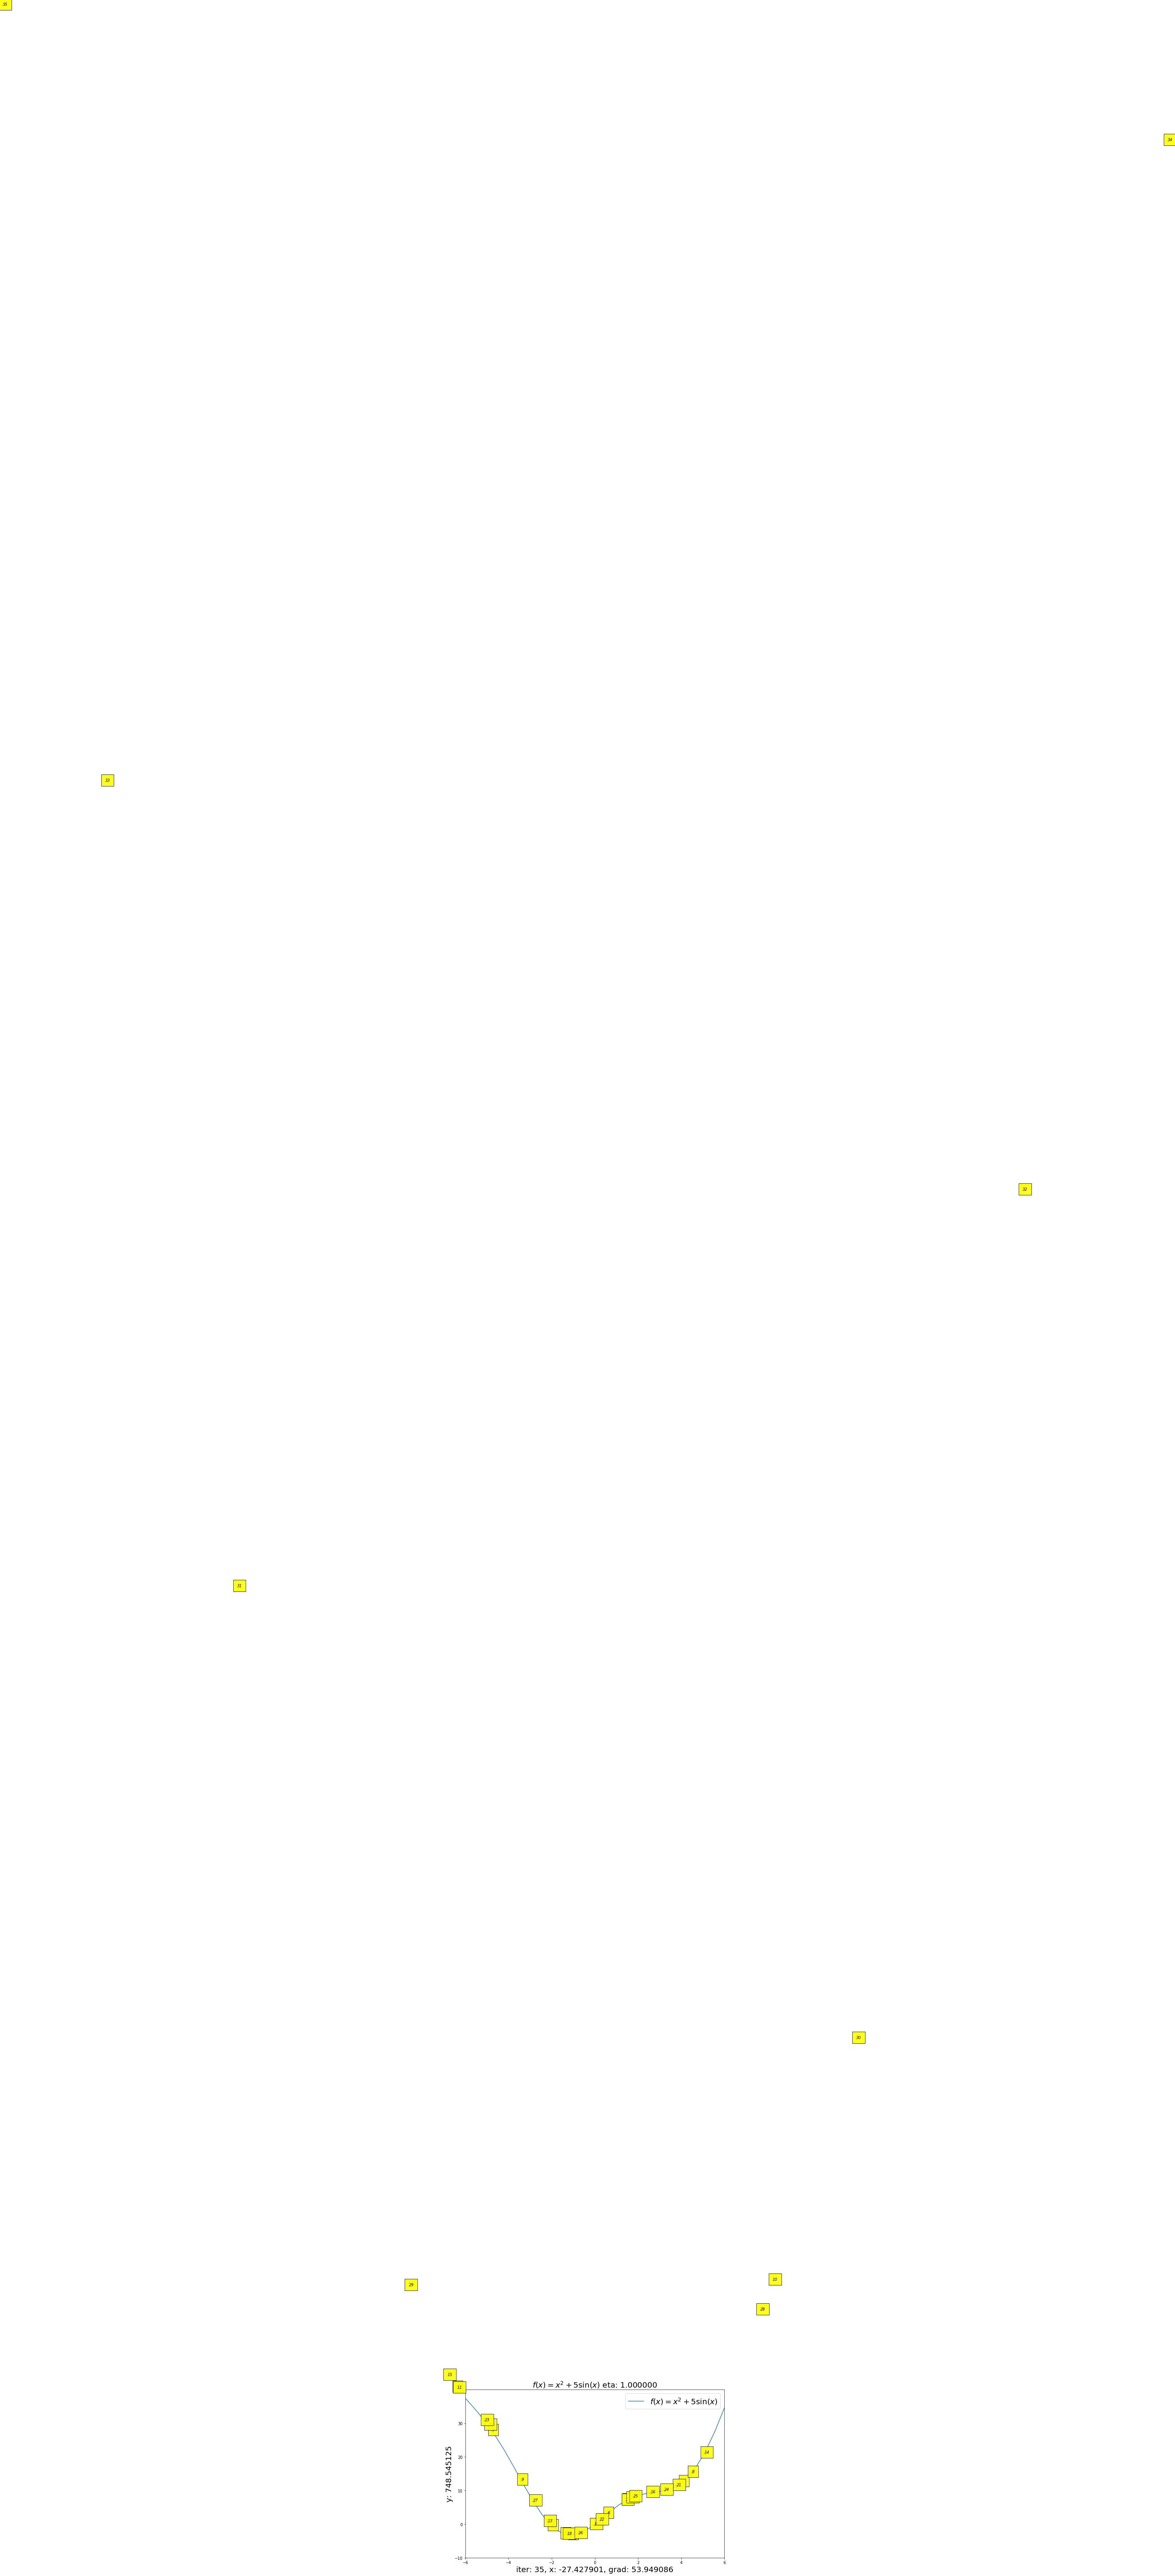

In [12]:
(x_, i_) = GD_Graph(1, 5)

### Learning rate

The **speed of convergence** of GD does not only depend on the **start point but also** on the **learning rate**

* EX1: $x_{0} = -5, \eta = 0.01$

In [ ]:
(x_, i_) = GD_Graph(0.01, 5) 

* EX2: $x_{0} = -5, ~ \eta = 0.5$

In [ ]:
(x_, i_) =  GD_Graph(0.5, -5) 

## Gradient Descent with multiple variants

Assume we would like to find minimum of $f(\mathbf{\theta})~,~\mathbf{\theta}~is~a~vector$

\begin{align}
\Large \nabla_{\theta}f(\theta) & = \Large f'(\theta) \\
\Large \theta_{t+1} & = \Large \theta_{t} - \eta \nabla_{\theta} f(\theta_{t}) \\
\end{align}

**Simple form:**
$$\Large \theta  =  \theta - \eta \nabla_{\theta} f(\theta)$$

With **linear regression** the lost function is:

$$\Large \mathcal{L}(\mathbf{w}) = \frac{1}{2N}||\mathbf{y - \bar{X}w}||_2^2 ~~~~~(0)$$

Gradient of lost function

$$\Large \nabla_{\mathbf{w}}\mathcal{L}(\mathbf{w}) = 
\frac{1}{N}\mathbf{\bar{X}}^T \mathbf{(\bar{X}w - y)} ~~~~~(1)$$

### Gradient

$$\Large f’(x) = \lim_{\varepsilon \rightarrow 0}\frac{f(x + \varepsilon) - f(x)}{\varepsilon}$$

#### Calculate gradient with **Numerical Gradient**

$$\Large f’(x) \approx \frac{f(x + \varepsilon) - f(x - \varepsilon)}{2\varepsilon} ~~~~ (2)$$

$$\Large \varepsilon: ~ is ~very ~small $$
**Why use gradient both side? Why do not use grandient left of right?**

* **Explain by geometry**

<img  src="N5980KKR0DS7FV1UU7FNJERD8LA3DK5H.png"/>

## Example

In [13]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt

np.random.seed(2)

**Recall (Linear Regression):**
$$\large \mathbf{w}^T\mathbf{x} = w_0 + w_1 x_1 + w_2 x_2 + w_3 x_3 + ... + w_N x_N  = y$$
$$\large  \mathbf{w} = (\mathbf{\bar{X}}^T\mathbf{\bar{X}})^{\dagger} \mathbf{\bar{X}}^T\mathbf{y} = \mathbf{A}^{\dagger}\mathbf{b} 
~~~ $$

**Where:**

$$\large \mathbf{A} \triangleq \mathbf{\bar{X}}^T\mathbf{\bar{X}} $$ 
$$\large \mathbf{\bar{X}}^T\mathbf{y} \triangleq \mathbf{b}$$

Solution found by formula: w =  [[1.00310372 1.99388195]]


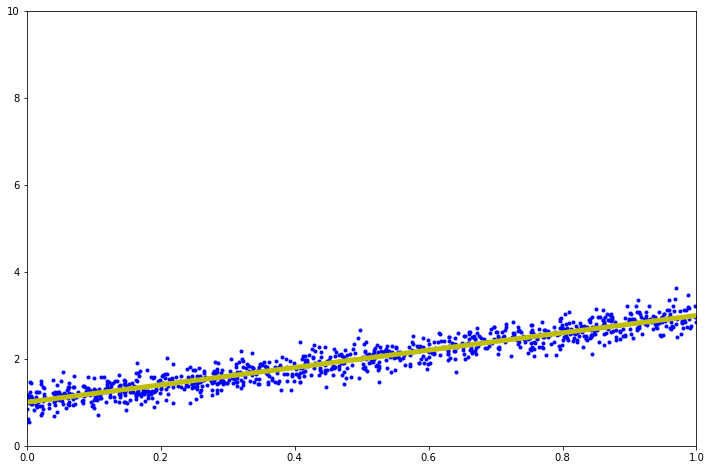

In [24]:
plt.figure(figsize=(12, 8))

X = np.random.rand(1000, 1) # Number of data set
y = 1 + 2 * X + .2 * np.random.randn(X.shape[0], 1) # noise added

# Building Xbar 
one = np.ones((X.shape[0],1))
Xbar = np.concatenate((one, X), axis = 1)

A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w = np.dot(np.linalg.pinv(A), b)
print('Solution found by formula: w = ',w.T)

# Display result
w_0 = w[0][0]
w_1 = w[1][0]
x0 = np.linspace(0, 1, 2, endpoint=True)
y0 = w_0 + w_1*x0

# Draw the fitting line 
plt.plot(X.T, y.T, 'b.')     # data 
plt.plot(x0, y0, 'y', linewidth = 5)   # the fitting line
plt.axis([0, 1, 0, 10])
plt.show()

**Calculate Xbar:**

In [25]:
X

array([[7.72688424e-01],
       [2.14675882e-01],
       [6.18566640e-01],
       [4.61144070e-01],
       [8.26303697e-01],
       [7.33854290e-01],
       [9.77026941e-01],
       [1.00171250e-01],
       [3.38292416e-01],
       [3.61605086e-01],
       [2.58492747e-01],
       [5.05842892e-01],
       [1.47242823e-01],
       [4.25473846e-01],
       [6.07005167e-01],
       [6.00221438e-01],
       [5.72812432e-01],
       [2.41217511e-02],
       [5.54169003e-01],
       [5.31675260e-03],
       [6.08976952e-02],
       [1.44630678e-01],
       [4.11646018e-01],
       [4.27442326e-01],
       [4.36649503e-03],
       [3.07933231e-01],
       [3.31814972e-01],
       [1.31419362e-01],
       [9.87562085e-01],
       [7.71098009e-01],
       [2.54422646e-01],
       [5.92478186e-01],
       [2.00200223e-01],
       [3.31471500e-01],
       [8.99313882e-01],
       [8.12057613e-01],
       [8.22238744e-01],
       [3.88339188e-01],
       [5.10842833e-01],
       [1.07683517e-01],


In [26]:
def CalXbar(X):
    one = np.ones((X.shape[0],1))
    return np.concatenate((one, X), axis = 1)
    

**Lost (Cost) function:**
 $$\large \mathcal{L}(\mathbf{w}) = \frac{1}{2N}||\mathbf{y - \bar{X}w}||_2^2 $$

In [28]:
def lost(Xbar, w): 
    N = Xbar.shape[0]
    return 1/(2*N) * np.linalg.norm(y - Xbar.dot(w), 2)**2

    

**Gradient function:**
$$\large \nabla_{\mathbf{w}}\mathcal{L}(\mathbf{w}) = 
\frac{1}{N}\mathbf{\bar{X}}^T \mathbf{(\bar{X}w - y)} $$

In [29]:
def grad(Xbar, w): 
    N = Xbar.shape[0]
    return 1/N * Xbar.T.dot(Xbar.dot(w) - y)

**Numerical grad function:**
$$\large f’(x) \approx \frac{f(x + \varepsilon) - f(x - \varepsilon)}{2\varepsilon} $$

In [30]:
def numerical_grad(Xbar, w, cost):
    eps = 1e-4
    g = np.zeros_like(w) #Return an array of zeros with the same shape and type as a given array.
    for i in range(len(w)):
        w_p = w.copy()
        w_n = w.copy()
        w_p[i] += eps # positive
        w_n[i] -= eps # negative
        g[i] = (lost(Xbar, w_p) - lost(Xbar, w_n))/(2*eps)
    return g 

**Compare Grad &  Numerical grad function**

In [32]:
import numpy as np

def check_grad(Xbar, w, cost, grad):
    w = np.random.rand(w.shape[0], w.shape[1])
    grad1 = grad(Xbar, w)
    grad2 = numerical_grad(Xbar, w, cost)
    return True if np.linalg.norm(grad1 - grad2) < 1e-6 else False 

w = np.random.rand(2, 1)

print( 'Checking gradient...', check_grad(Xbar, w, lost, grad))

Checking gradient... True


## Gradient Descent  Demo

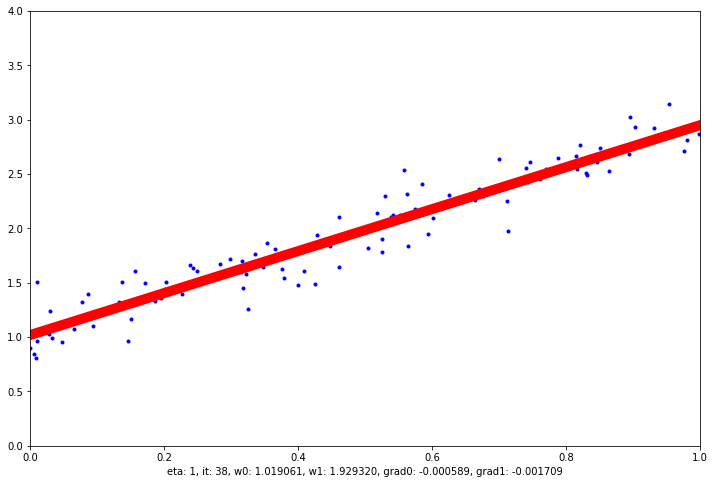

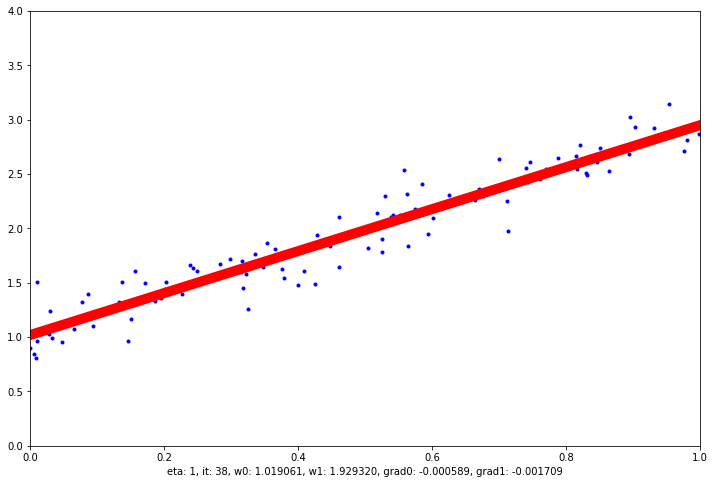

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import time
import pylab as pl
from IPython import display


def CalXbar(X):
    one = np.ones((X.shape[0],1))
    return np.concatenate((one, X), axis = 1)
def grad(xbar, w): 
    N = xbar.shape[0]
    return 1/N * xbar.T.dot(xbar.dot(w) - y)


fig = plt.figure(figsize=(12, 8))
N = 100
# X = np.random.rand(N, 1)
# y = 1 + 2 * X + .2 * np.random.randn(N, 1) # noise added
X = np.array([.1,.2,.3,.4,.5,.6,.7,.8]).reshape((8,1))
y=np.asarray([1+.2, 1+0.4])
# Draw the fitting line 
plt.plot(X.T, y.T, 'b.')     # data 

# calculate GD
w_init = np.array([[2], [1]])
w = [w_init]

eta = 1.5
xbar = CalXbar(X)
grs = []

for it in range(100):
    plt.cla()
    g = grad(xbar, w[-1])
    w_new = w[-1] - eta * g
    
    #draw line
    xt = [0, 1]
    plt.plot(X.T, y.T, 'b.')     # data 
    yt = w_new[0] + w_new[1] * xt
    
    gr = grad(xbar, w_new)
    
    plt.plot(xt, yt, 'r-', lw=10) 
    plt.xlabel('eta: %d, it: %d, w0: %f, w1: %f, grad0: %f, grad1: %f' %(eta, it, w_new[0], w_new[1], gr[0], gr[1]))
    plt.axis([0, 1, 0, 4])
    
    display.clear_output(wait=True)
#     time.sleep(.1)
    display.display(plt.gcf())
    
    if np.linalg.norm(gr)/len(w_new) < 1e-3:
        break
    w.append(w_new)
    grs.append(gr)



In [4]:
import pandas as pd
pd.DataFrame(np.asarray(w).reshape((len(w),2)))
# pd.DataFrame(np.asarray(grs).reshape((len(grs),2)))

0         1
0   2.000000  1.000000
1   1.184518  0.737813
2   1.777065  1.170804
3   1.175592  0.987335
4   1.605649  1.312056
5   1.161737  1.184559
6   1.473561  1.428495
7   1.145708  1.340641
8   1.371559  1.524215
9   1.129240  1.464311
10  1.292623  1.602712
11  1.113378  1.562407
12  1.231410  1.666950
13  1.098705  1.640298
14  1.183844  1.719422
15  1.085503  1.702207
16  1.146808  1.762212
17  1.073860  1.751456
18  1.117915  1.797056
19  1.063746  1.790667
20  1.095334  1.825394
21  1.055063  1.821911
22  1.077653  1.848414
23  1.047677  1.846825
24  1.063785  1.867094
25  1.041444  1.866704
26  1.052890  1.882240
27  1.036216  1.882575
28  1.044317  1.894509
29  1.031855  1.895254
30  1.037560  1.904441
31  1.028232  1.905388
32  1.032228  1.912476
33  1.025234  1.913492
34  1.028015  1.918972
35  1.022762  1.919976
36  1.024681  1.924221
37  1.020729  1.925165
38  1.022040  1.928461

**Level sets - Đường đồng mức**

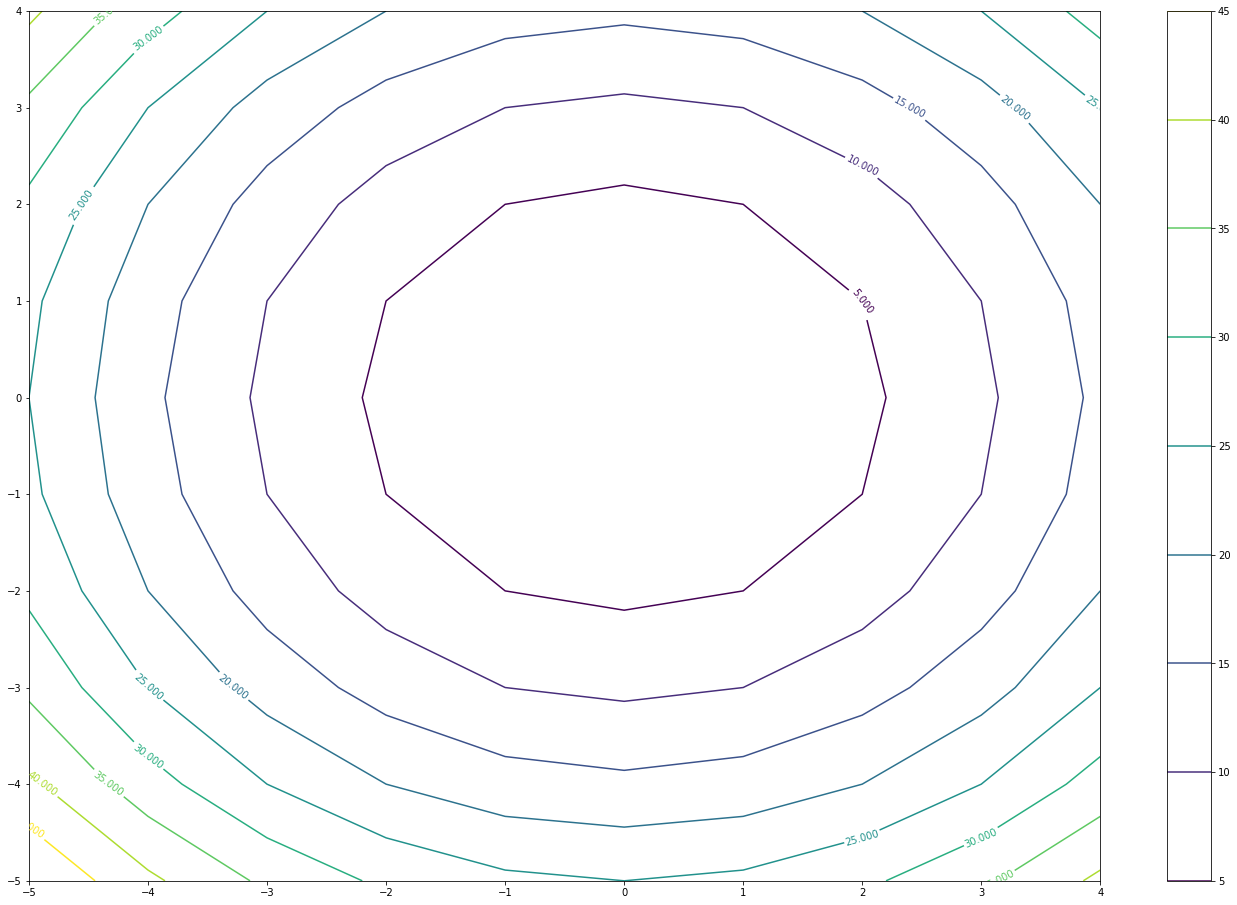

In [5]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import time
import pylab as pl
from IPython import display
 
def f(x,y):
    #return np.minimum(np.minimum(np.minimum(x,x-y),x**2),y+1)
    return x**2 + y**2

plt.figure(figsize=(24, 16))

x_ = np.arange(-5,5,1)
y_ = np.arange(-5,5,1)

x,y = np.meshgrid(x_, y_)

levels = f(x, y)

c = plt.contour(x, y, levels, 10)
manual_locations = zip(x_,y_)
print (manual_locations)
plt.clabel(c, inline=1, fontsize=10)
plt.colorbar()

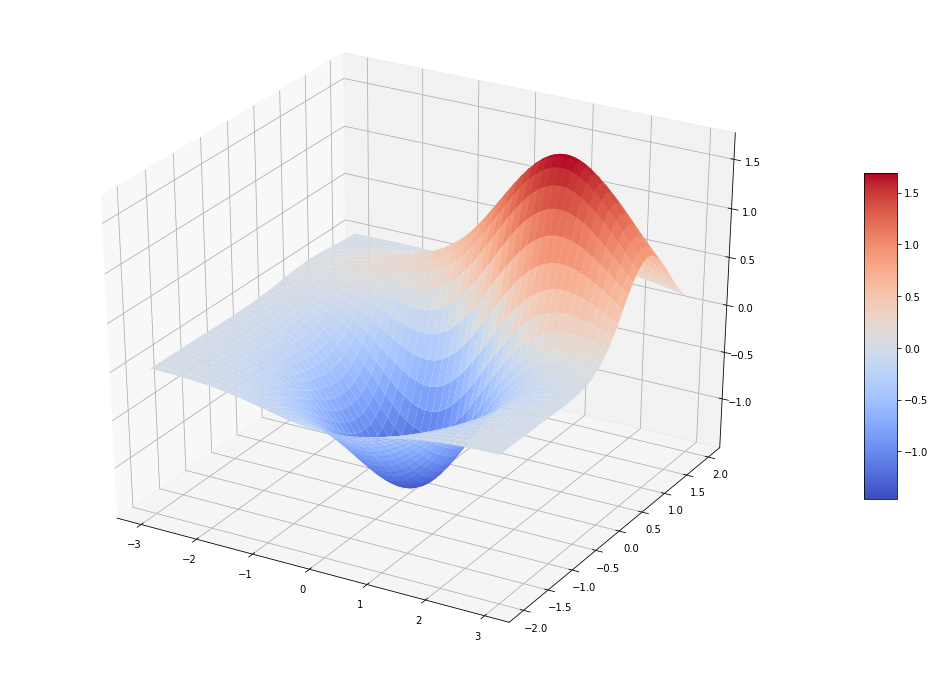

<a list of 9 text.Text objects>

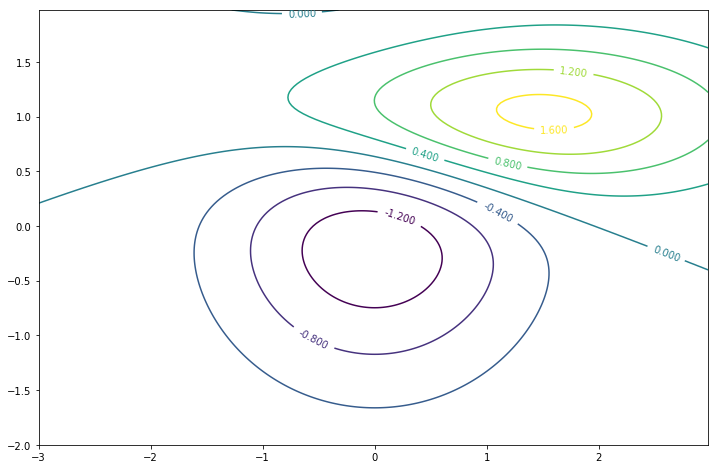

In [6]:
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'

fig = plt.figure(figsize=(18, 12))
ax = fig.gca(projection='3d')

delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = mlab.bivariate_normal(X, Y, 1.0, 1.0, 0.0, 0.0)
Z2 = mlab.bivariate_normal(X, Y, 1.5, 0.5, 1, 1)
# difference of Gaussians
Z = 10.0 * (Z2 - Z1)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=True)
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=.5, aspect=10)
plt.show()

plt.figure(figsize=(12, 8))
CS = plt.contour(X, Y, Z)
plt.clabel(CS, inline=1, fontsize=10)

# Feature Scaling

We can speed up gradient descent by having each of our input values in roughly the same range. This is because $w$ will descend quickly on small ranges and slowly on large ranges,

The way to prevent this is to modify the ranges of our input variables so that they are all roughly the same. Ideally:

$−1 ≤ x(i) ≤ 1$

or

$−0.5 ≤ x(i) ≤ 0.5$

Two techniques to help with this are **feature scaling** and **mean normalization.**

* **Feature scaling**

 $$x_i := \dfrac{x_i}{s_i}$$
 
 $s_i$ is the range of values (max - min)

* **Mean normalization**

$$x_i := \dfrac{x_i - \mu_i}{s_i}$$

Where 

 $$\mu_i ~ is ~ the ~ average ~ of ~ all ~ the ~ values ~ for ~ feature ~ (i)$$


# Notes

## Standard deviation 
refer to http://www.mathsisfun.com/data/standard-deviation.html

<img  src="NQC9BQRIVTB8EWGL6PXAPQYIDQVTLAGR.png"/>

** Mean **

$$Mean  =   \frac {600 + 470 + 170 + 430 + 3005} {5}   =   \frac{1970}{5}   =  394$$



** Variance **


<img  src="KWWWRMNIUPFT6MAIM3MIHW0H6M109AQ8.png"/>

$$ \sigma^2 = \frac {206^2 + 76^2 + (-224)^2 + 36^2 + (-94)^2}{5} = 21,704$$